In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot

In [22]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [23]:
data=pd.read_csv('C:/Users/Jathu/Desktop/Datastorm/credit_card_default_train.csv')
data_2=pd.read_csv('C:/Users/Jathu/Desktop/Datastorm/credit_card_default_test.csv')
data.isna().sum()


Client_ID             0
Balance_Limit_V1      0
Gender                0
EDUCATION_STATUS      0
MARITAL_STATUS        0
AGE                   0
PAY_JULY              0
PAY_AUG               0
PAY_SEP               0
PAY_OCT               0
PAY_NOV               0
PAY_DEC               0
DUE_AMT_JULY          0
DUE_AMT_AUG           0
DUE_AMT_SEP           0
DUE_AMT_OCT           0
DUE_AMT_NOV           0
DUE_AMT_DEC           0
PAID_AMT_JULY         0
PAID_AMT_AUG          0
PAID_AMT_SEP          0
PAID_AMT_OCT          0
PAID_AMT_NOV          0
PAID_AMT_DEC          0
NEXT_MONTH_DEFAULT    0
dtype: int64

In [24]:
data_2

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC
0,A20170,500K,M,Other,Single,31-45,0,0,0,0,...,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991
1,A16887,200K,F,Other,Single,31-45,0,0,0,0,...,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620
2,A3430,400K,M,Other,Other,Less than 30,-1,-1,2,0,...,8984,11294,9561,993,6930,0,2310,0,2310,40060
3,A3696,1.5M,M,Graduate,Single,31-45,1,-1,-1,-2,...,5775,0,0,0,5775,5775,0,0,0,0
4,A20474,100K,F,High School,Other,Less than 30,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,A11104,1M,M,High School,Other,31-45,0,0,0,0,...,522982,470226,475236,461148,21945,23100,16401,17325,18457,16170
5996,A2781,1.5M,F,Graduate,Single,31-45,-1,-1,-1,-2,...,0,0,1065,-7,1167,0,0,1065,7,0
5997,A1767,300K,M,Other,Single,31-45,0,0,0,0,...,79508,85075,87965,93403,5683,4620,6930,4620,6930,11550
5998,A1850,200K,M,High School,Single,46-65,-1,2,-1,0,...,35574,34650,34650,34650,0,35574,0,0,0,231


In [25]:
Labels=data.pop('NEXT_MONTH_DEFAULT')
ID=data.pop('Client_ID')
balance=data.pop('Balance_Limit_V1')
ID_2=data_2.pop('Client_ID')
balance_2=data_2.pop('Balance_Limit_V1')

In [26]:
data_2

,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,...,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC
0,M,Other,Single,31-45,0,0,0,0,0,0,...,128316,311201,351790,352206,13710,12816,195701,53246,17256,12991
1,F,Other,Single,31-45,0,0,0,0,0,0,...,91823,94181,97221,100275,3756,3842,3890,4620,4620,4620
2,M,Other,Other,Less than 30,-1,-1,2,0,0,-1,...,8984,11294,9561,993,6930,0,2310,0,2310,40060
3,M,Graduate,Single,31-45,1,-1,-1,-2,-2,-2,...,5775,0,0,0,5775,5775,0,0,0,0
4,F,High School,Other,Less than 30,0,0,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,M,High School,Other,31-45,0,0,0,0,0,0,...,522982,470226,475236,461148,21945,23100,16401,17325,18457,16170
5996,F,Graduate,Single,31-45,-1,-1,-1,-2,-1,-1,...,0,0,1065,-7,1167,0,0,1065,7,0
5997,M,Other,Single,31-45,0,0,0,0,0,0,...,79508,85075,87965,93403,5683,4620,6930,4620,6930,11550
5998,M,High School,Single,46-65,-1,2,-1,0,0,0,...,35574,34650,34650,34650,0,35574,0,0,0,231


In [27]:
for i in range (len(balance)):
    if balance[i][-1]=='M':
        balance[i]=float(balance[i][:-1])*1000000
    elif balance[i][-1]=='K':
        balance[i]=float(balance[i][:-1])*1000
    else:
         balance[i]=float(balance[i])*1
            
for i in range (len(balance_2)):
    if balance_2[i][-1]=='M':
        balance_2[i]=float(balance_2[i][:-1])*1000000
    elif balance_2[i][-1]=='K':
        balance_2[i]=float(balance_2[i][:-1])*1000
    else:
         balance_2[i]=float(balance_2[i])*1

#print(balance.head())
balance=pd.to_numeric(balance)
balance_2=pd.to_numeric(balance_2)
#balance.dtype
data=pd.concat([data,balance],axis=1)
data_2=pd.concat([data_2,balance_2],axis=1)
        
                    

In [28]:
gender_dummies=pd.get_dummies(data['Gender'],drop_first=True)
gender=data.pop('Gender')
data=pd.concat([data,gender_dummies],axis=1)

gender_dummies_2=pd.get_dummies(data_2['Gender'],drop_first=True)
gender_2=data_2.pop('Gender')
data_2=pd.concat([data_2,gender_dummies_2],axis=1)

In [29]:
data_2

,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,...,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,Balance_Limit_V1,M
0,Other,Single,31-45,0,0,0,0,0,0,194188,...,351790,352206,13710,12816,195701,53246,17256,12991,500000.0,1
1,Other,Single,31-45,0,0,0,0,0,0,87115,...,97221,100275,3756,3842,3890,4620,4620,4620,200000.0,0
2,Other,Other,Less than 30,-1,-1,2,0,0,-1,2693,...,9561,993,6930,0,2310,0,2310,40060,400000.0,1
3,Graduate,Single,31-45,1,-1,-1,-2,-2,-2,0,...,0,0,5775,5775,0,0,0,0,1500000.0,1
4,High School,Other,Less than 30,0,0,-2,-2,-2,-2,85257,...,0,0,0,0,0,0,0,0,100000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,High School,Other,31-45,0,0,0,0,0,0,512728,...,475236,461148,21945,23100,16401,17325,18457,16170,1000000.0,1
5996,Graduate,Single,31-45,-1,-1,-1,-2,-1,-1,1610,...,1065,-7,1167,0,0,1065,7,0,1500000.0,0
5997,Other,Single,31-45,0,0,0,0,0,0,188646,...,87965,93403,5683,4620,6930,4620,6930,11550,300000.0,1
5998,High School,Single,46-65,-1,2,-1,0,0,0,1677,...,34650,34650,0,35574,0,0,0,231,200000.0,1


In [30]:
edu_dummies=pd.get_dummies(data['EDUCATION_STATUS'])
edu_dummies.columns = ['GRADUATE','HIGH SCHOOL','OTHER_1']
eduation=data.pop('EDUCATION_STATUS')
data=pd.concat([data,edu_dummies],axis=1)


edu_dummies_2=pd.get_dummies(data_2['EDUCATION_STATUS'])
edu_dummies_2.columns = ['GRADUATE','HIGH SCHOOL','OTHER_1']
eduation_2=data_2.pop('EDUCATION_STATUS')
data_2=pd.concat([data_2,edu_dummies_2],axis=1)

In [31]:
marital_dummies=pd.get_dummies(data['MARITAL_STATUS'])
marital_status=data.pop('MARITAL_STATUS')
data=pd.concat([data,marital_dummies],axis=1)

marital_dummies_2=pd.get_dummies(data_2['MARITAL_STATUS'])
marital_status_2=data_2.pop('MARITAL_STATUS')
data_2=pd.concat([data_2,marital_dummies_2],axis=1)

In [32]:
age_dummies=pd.get_dummies(data['AGE'],drop_first=True)
age=data.pop('AGE')
data=pd.concat([data,age_dummies],axis=1)

age_dummies_2=pd.get_dummies(data_2['AGE'],drop_first=True)
age_2=data_2.pop('AGE')
data_2=pd.concat([data_2,age_dummies_2],axis=1)

pay_july=data.pop('PAY_JULY')
pay_aug=data.pop('PAY_AUG')
pay_sep=data.pop('PAY_SEP')
pay_oct=data.pop('PAY_OCT')
pay_nov=data.pop('PAY_NOV')
pay_dec=data.pop('PAY_DEC')

pay_july_2=data_2.pop('PAY_JULY')
pay_aug_2=data_2.pop('PAY_AUG')
pay_sep_2=data_2.pop('PAY_SEP')
pay_oct_2=data_2.pop('PAY_OCT')
pay_nov_2=data_2.pop('PAY_NOV')
pay_dec_2=data_2.pop('PAY_DEC')


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost

In [34]:
train_data, test_data, train_label, test_label = train_test_split(data,Labels,test_size = 0.2,random_state = 100)

In [35]:
data

,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,...,Balance_Limit_V1,M,GRADUATE,HIGH SCHOOL,OTHER_1,Other,Single,46-65,Less than 30,More than 65
0,-1,-1,-1,-1,-1,-1,3248,3389,6004,39418,...,1000000.0,1,1,0,0,1,0,0,0,0
1,0,-1,-1,-1,-1,0,353351,151818,26948,43530,...,1000000.0,0,0,1,0,1,0,0,1,0
2,4,3,2,2,-2,-2,16681,16082,15477,0,...,100000.0,0,0,1,0,0,1,0,0,0
3,2,0,0,0,0,0,90457,92848,95193,97309,...,200000.0,0,1,0,0,0,1,0,0,0
4,2,2,0,0,0,0,429556,419466,429785,435354,...,1000000.0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0,0,0,0,0,0,436470,445403,481323,203289,...,1000000.0,0,0,1,0,0,1,0,0,0
23996,-1,-1,-1,-1,0,0,3888,4223,8090,20741,...,400000.0,0,0,1,0,1,0,0,0,0
23997,4,3,2,-1,0,0,8235,7752,6371,48228,...,100000.0,0,0,0,1,1,0,0,0,0
23998,1,-1,0,0,0,-1,-3800,181055,176262,121908,...,200000.0,0,0,1,0,0,1,0,0,0


0.819375
0.8270833333333333
0.4611559975139838
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3773
           1       0.64      0.36      0.46      1027

    accuracy                           0.82      4800
   macro avg       0.74      0.65      0.68      4800
weighted avg       0.80      0.82      0.80      4800



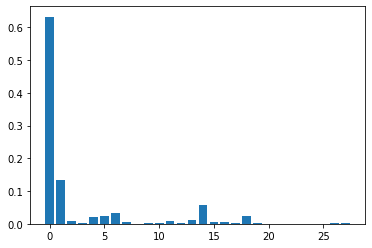

In [39]:
clf = DecisionTreeClassifier(max_depth=6).fit(train_data,train_label)
print(format(clf.score(test_data,test_label)))
print(format(clf.score(train_data,train_label)))
y_predict=clf.predict(test_data)
print(f1_score(test_label,y_predict))
print(classification_report(test_label,y_predict))

importances=(clf.feature_importances_)
#indices = np.argsort(importances)[::-1]
pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()


In [40]:
from sklearn.ensemble import AdaBoostClassifier
clf = DecisionTreeClassifier(max_depth=6)
model=xgboost.XGBClassifier(base_estimator=clf,max_depth=6,n_estimators=75,objective='binary:logistic',gamma=8.1,learning_rate=0.2,reg_lambda=1).fit(train_data,train_label)
y_predict=model.predict(test_data)
print(format(model.score(train_data,train_label)))
print(format(model.score(test_data,test_label)))
print(f1_score(test_label,y_predict))
print(classification_report(test_label,y_predict))

0.8278125
0.8220833333333334
0.47413793103448276
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3773
           1       0.64      0.37      0.47      1027

    accuracy                           0.82      4800
   macro avg       0.75      0.66      0.68      4800
weighted avg       0.80      0.82      0.80      4800



In [20]:
submit=pd.read_csv('C:/Users/MithunjhaAnandakumar/Downloads/data-storm-10/submit.csv')
submit.pop('NEXT_MONTH_DEFAULT')
predic=model.predict(data_2)
print(predic[0:100])
result=pd.DataFrame(predic,columns=['NEXT_MONTH_DEFAULT'])
submit=pd.concat([submit,result],axis=1)

FileNotFoundError: [Errno 2] File b'C:/Users/MithunjhaAnandakumar/Downloads/data-storm-10/submit.csv' does not exist: b'C:/Users/MithunjhaAnandakumar/Downloads/data-storm-10/submit.csv'

In [248]:
export_csv=submit.to_csv('C:/Users/MithunjhaAnandakumar/Downloads/data-storm-10/submit.csv')